### <b> Problem Statement </b>
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information<br>
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library <br>
to see if we can find any patterns in the data. <br><br>
2.  Write a code to check how the price of the ticket (column name: 'fare') for each <br>
passenger is distributed by plotting a histogram.

### <b> Solution:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('Datasets/traintitanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Number of males and females

In [3]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

How many survived from male and female?

In [4]:
titanic.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

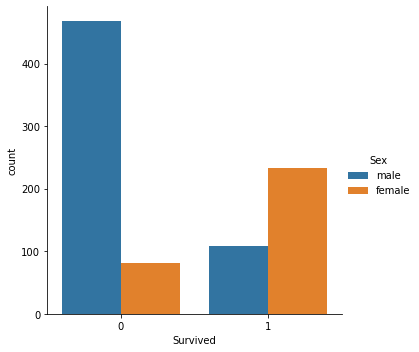

In [5]:
# Countplot
sns.catplot(x ="Survived", hue ="Sex", kind ="count", data = titanic)

Class Wise

In [6]:
print("Total Passengers: ", titanic["Pclass"].count())
print("Total Passengers according to class wise:\n", titanic["Pclass"].value_counts())

Total Passengers:  891
Total Passengers according to class wise:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


Total Passengers:  891


C:\Users\Sidhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


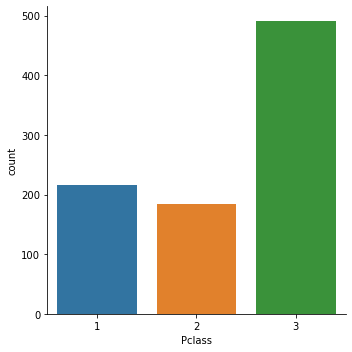

In [7]:
print("Total Passengers: ", titanic["Pclass"].count())
sns.catplot('Pclass', data=titanic, kind='count')

Class Wise Male-Female

In [8]:
print("Total Passengers according to class wise Male-Female:\n", titanic.groupby("Sex")["Pclass"].value_counts())

Total Passengers according to class wise Male-Female:
 Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64


C:\Users\Sidhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


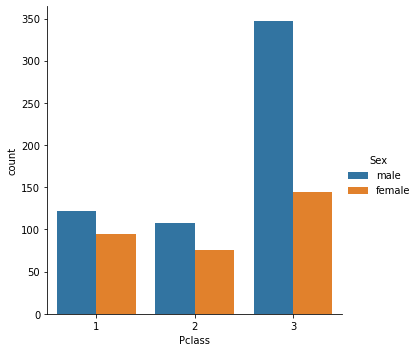

In [9]:
sns.catplot('Pclass', data=titanic, hue='Sex', kind='count')

### <b> Survival Class Wise

In [10]:
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

C:\Users\Sidhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


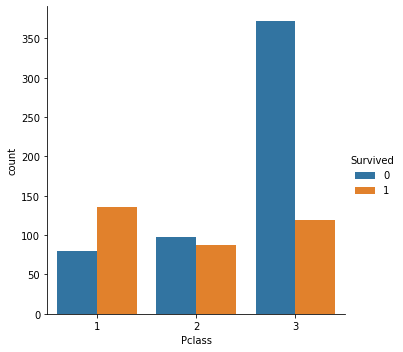

In [12]:
sns.catplot('Pclass', hue='Survived', data=titanic, kind='count')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

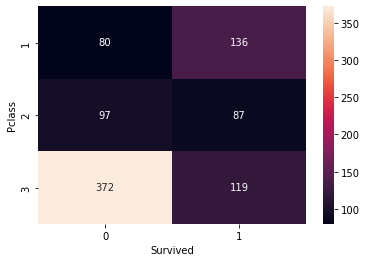

In [14]:
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

Ages of Passengers

<AxesSubplot:>

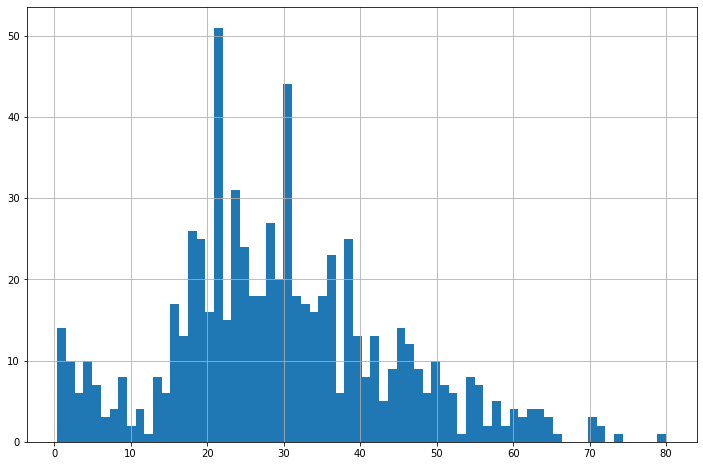

In [15]:
titanic['Age'].hist(bins=70, figsize=(12,8))

FARE

In [16]:
titanic.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [17]:
titanic.groupby("Sex")["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

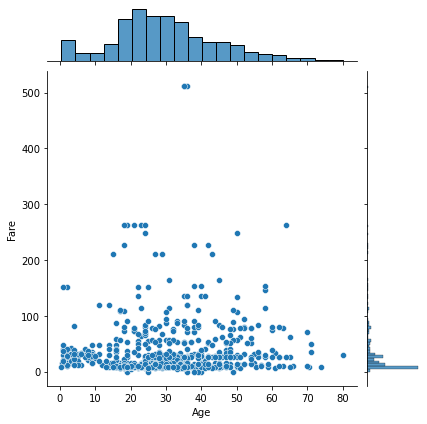

In [20]:
sns.jointplot(x='Age', y='Fare', data=titanic)

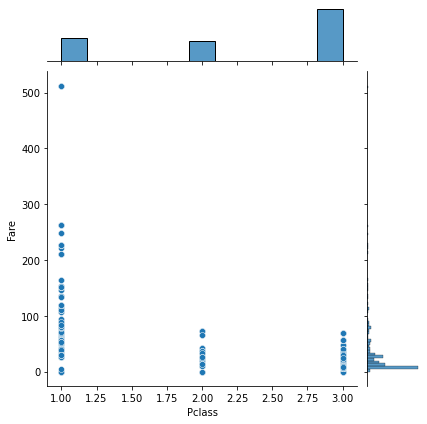

In [80]:
sns.jointplot(x='Pclass', y='Fare', data=titanic)